In [1]:
# Importing the modules
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('2022.csv')
data.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,1192021,1,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1212021,1,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1212021,1,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1172021,1,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1152021,1,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0
5,1.0,1.0,1142021,1,14,2021,1100.0,2021000006,2.021000e+09,1.0,...,1.0,1.0,29.0,42.0,2.0,2.0,1.0,1.0,0.0,0.0
6,1.0,1.0,1082021,1,8,2021,1100.0,2021000007,2.021000e+09,1.0,...,1.0,1.0,43.0,122.0,2.0,1.0,1.0,1.0,0.0,0.0
7,1.0,1.0,1212021,1,21,2021,1100.0,2021000008,2.021000e+09,1.0,...,1.0,1.0,57.0,143.0,2.0,1.0,1.0,1.0,0.0,0.0
8,1.0,2.0,2202021,2,20,2021,1100.0,2021000009,2.021000e+09,1.0,...,1.0,0.0,129.0,NaN,1.0,9.0,1.0,1.0,0.0,1.0
9,1.0,2.0,2202021,2,20,2021,1100.0,2021000010,2.021000e+09,1.0,...,1.0,1.0,100.0,158.0,1.0,1.0,1.0,1.0,0.0,0.0


In [3]:
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,1192021,1,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1212021,1,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1212021,1,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1172021,1,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1152021,1,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0


In [4]:
data.shape

(438693, 303)

In [5]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(298), int64(5)
memory usage: 1014.1 MB


_STATE      float64
FMONTH      float64
IDATE         int64
IMONTH        int64
IDAY          int64
             ...   
_VEGLT1A    float64
_FRT16A     float64
_VEG23A     float64
_FRUITE1    float64
_VEGETE1    float64
Length: 303, dtype: object

# Data Preprocessing

In [6]:
dataframe = data.copy()

In [7]:
for cols in dataframe.columns:
    if cols.startswith("_") and cols!="RACE":
        dataframe.drop(cols,axis=1,inplace=True)
print(dataframe.shape)

(438693, 231)


In [8]:
dataframe2=pd.DataFrame(dataframe)

In [9]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 231 columns):
 #    Column    Dtype  
---   ------    -----  
 0    FMONTH    float64
 1    IDATE     int64  
 2    IMONTH    int64  
 3    IDAY      int64  
 4    IYEAR     int64  
 5    DISPCODE  float64
 6    SEQNO     int64  
 7    CTELENM1  float64
 8    PVTRESD1  float64
 9    COLGHOUS  float64
 10   STATERE1  float64
 11   CELPHON1  float64
 12   LADULT1   float64
 13   COLGSEX   float64
 14   NUMADULT  float64
 15   LANDSEX   float64
 16   NUMMEN    float64
 17   NUMWOMEN  float64
 18   RESPSLCT  float64
 19   SAFETIME  float64
 20   CTELNUM1  float64
 21   CELLFON5  float64
 22   CADULT1   float64
 23   CELLSEX   float64
 24   PVTRESD3  float64
 25   CCLGHOUS  float64
 26   CSTATE1   float64
 27   LANDLINE  float64
 28   HHADULT   float64
 29   SEXVAR    float64
 30   GENHLTH   float64
 31   PHYSHLTH  float64
 32   MENTHLTH  float64
 33   POORHLTH  float64
 34   PRIMINSR  float64


In [10]:
dataframe.shape

(438693, 231)

In [11]:
non_important_columns = dataframe2.std()[dataframe2.std() == 0].index
print(non_important_columns)
dataframe2.drop(non_important_columns, axis=1, inplace=True)
dataframe2.shape

Index(['COLGHOUS', 'STATERE1', 'CELPHON1', 'SAFETIME', 'CTELNUM1', 'CELLFON5',
       'CADULT1', 'CCLGHOUS'],
      dtype='object')


(438693, 223)

In [12]:
dataframe2.isnull().sum().sort_values(ascending=False)/len(dataframe2)

TOLDCFS     1.000000
WORKCFS     1.000000
HAVECFS     1.000000
COLGSEX     0.999932
SIGMTES1    0.999856
              ...   
IYEAR       0.000000
DISPCODE    0.000000
SEQNO       0.000000
SEXVAR      0.000000
FMONTH      0.000000
Length: 223, dtype: float64

In [13]:
dataframe2.drop(['HAVECFS'],axis=1,inplace=True)
dataframe2.drop(['WORKCFS'],axis=1,inplace=True)
dataframe2.drop(['TOLDCFS'],axis=1,inplace=True)

<AxesSubplot:>

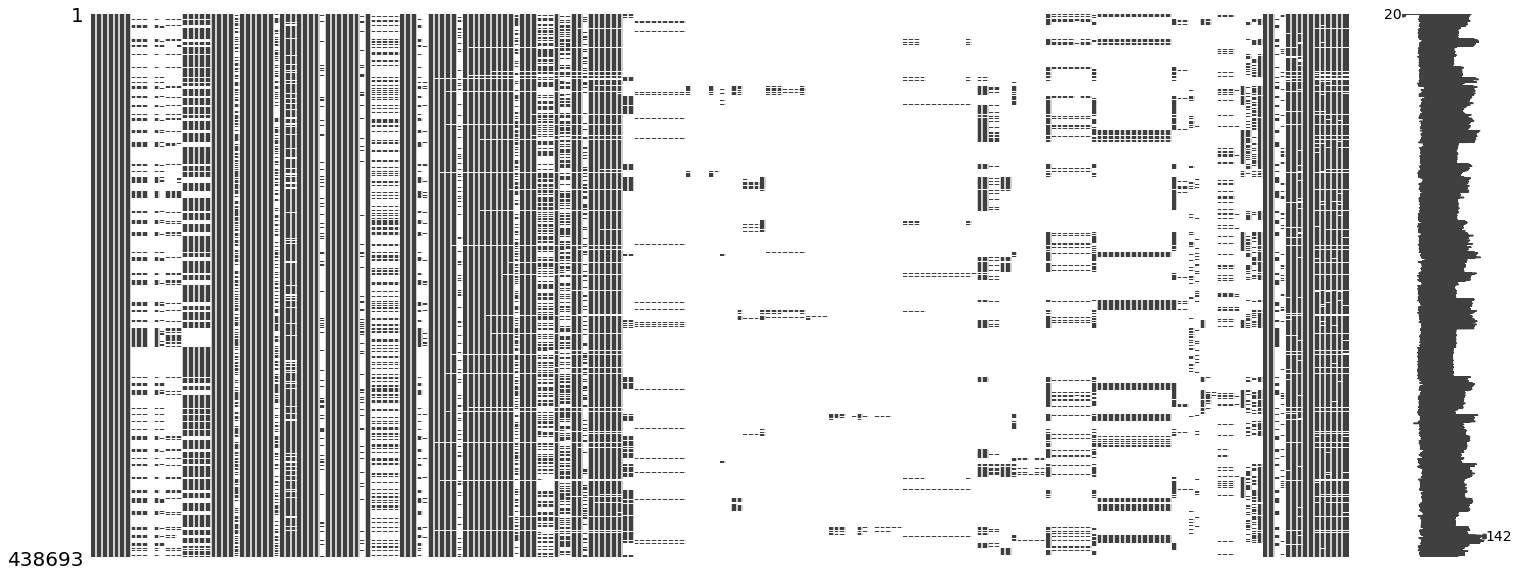

In [14]:
msno.matrix(dataframe2)

In [15]:
dataframe2.shape

(438693, 220)

In [16]:
list(dataframe2.columns)

['FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 'CTELENM1',
 'PVTRESD1',
 'LADULT1',
 'COLGSEX',
 'NUMADULT',
 'LANDSEX',
 'NUMMEN',
 'NUMWOMEN',
 'RESPSLCT',
 'CELLSEX',
 'PVTRESD3',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'PRIMINSR',
 'PERSDOC3',
 'MEDCOST1',
 'CHECKUP1',
 'EXERANY2',
 'BPHIGH6',
 'BPMEDS',
 'CHOLCHK3',
 'TOLDHI3',
 'CHOLMED3',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD3',
 'ADDEPEV3',
 'CHCKDNY2',
 'DIABETE4',
 'DIABAGE3',
 'HAVARTH5',
 'ARTHEXER',
 'ARTHEDU',
 'LMTJOIN3',
 'ARTHDIS2',
 'JOINPAI2',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL3',
 'NUMPHON3',
 'CPDEMO1B',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME3',
 'PREGNANT',
 'WEIGHT2',
 'HEIGHT3',
 'DEAF',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'USENOW3',
 'ECIGNOW1',
 'ALCDAY5',
 'AVEDRNK3',
 'DRNK3GE5',
 'MAXDRNKS',
 

<AxesSubplot:>

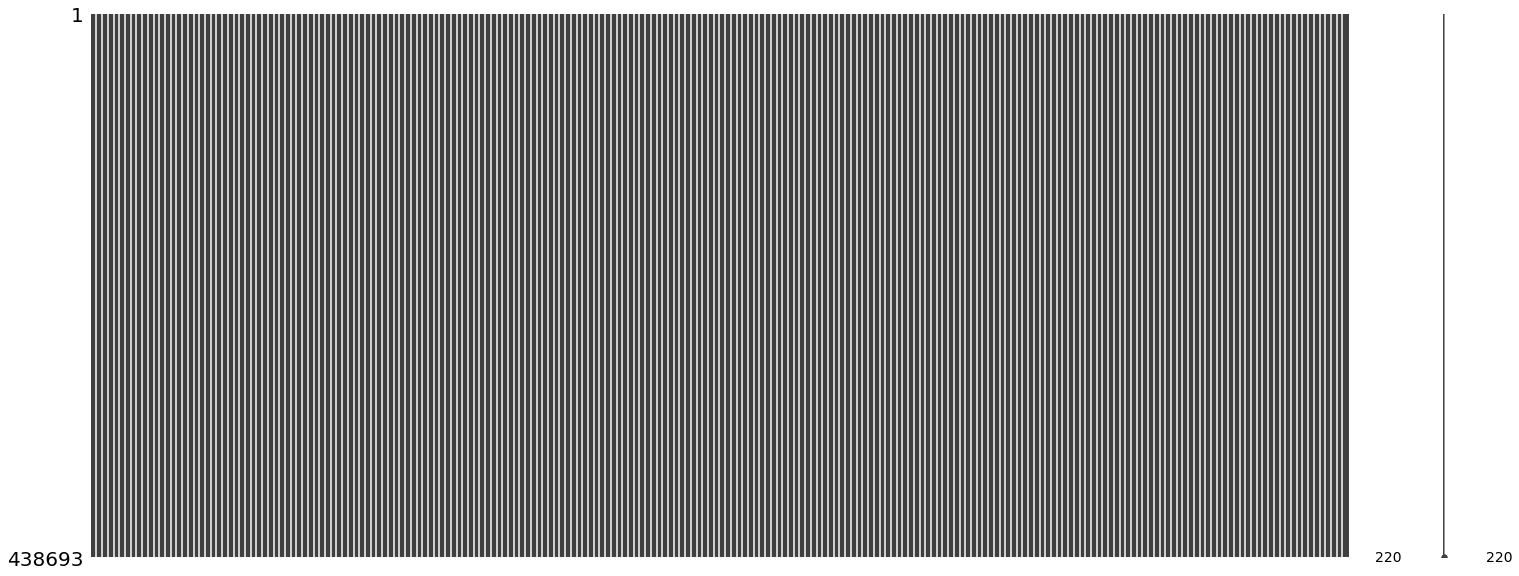

In [17]:
dataframe3=dataframe2.fillna(-1)
dataframe3.shape
msno.matrix(dataframe3)

In [18]:
(dataframe3.isnull().sum().sort_values(ascending=False)/len(dataframe3))*100

FMONTH      0.0
CSRVDEIN    0.0
BLDSTFIT    0.0
SDNATES1    0.0
CNCRDIFF    0.0
           ... 
ECIGNOW1    0.0
ALCDAY5     0.0
AVEDRNK3    0.0
DRNK3GE5    0.0
VEGEDA2_    0.0
Length: 220, dtype: float64

In [19]:
prediction=dataframe3[['DIABETE4']]
value1 = prediction["DIABETE4"].value_counts()
value1

 3.0    366342
 1.0     57616
 4.0      9942
 2.0      3808
 7.0       613
 9.0       369
-1.0         3
Name: DIABETE4, dtype: int64

In [20]:
print('Shape of DataFrame Before Removing Outliers', dataframe3.shape )
dataframe3=dataframe3[(np.abs(stats.zscore(dataframe3)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', dataframe3.shape )

Shape of DataFrame Before Removing Outliers (438693, 220)
Shape of DataFrame After Removing Outliers (83472, 220)


In [21]:
predictionX = dataframe3.loc[:, dataframe3.columns != 'DIABETE4']
predictionY = dataframe3['DIABETE4']
x_train, x_test, y_train, y_test = train_test_split(predictionX, predictionY, test_size=0.2, train_size = 0.8,)

In [22]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is-", accuracy_score(y_test, predicted)*100, "%","\n")
print("F1 score for logistic regression is-",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of Logistic Regression is- 89.81731057202755 % 

F1 score for logistic regression is- 84.99908943058082 %


In [23]:
y_train

320494    3.0
200483    3.0
98270     3.0
308292    4.0
413352    1.0
         ... 
144090    3.0
320911    1.0
104486    3.0
118139    3.0
303438    3.0
Name: DIABETE4, Length: 66777, dtype: float64

In [24]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train-1)
predicted = xgbc.predict(x_test)
predicted = predicted + 1
print ("The accuracy of XGBoost is-", accuracy_score(y_test, predicted)*100, "%","\n")
print("F1 score for XGBoost is-",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of XGBoost is- 97.130877508236 % 

F1 score for XGBoost is- 95.72482414530509 %


In [25]:
model = GaussianNB()
model.fit(x_train, y_train) 
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is-", accuracy_score(y_test, predicted)*100, "%","\n")
print("F1 score for Gaussian Naive Bayes is-",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of Gaussian Naive Bayes model is- 88.54147948487571 % 

F1 score for Gaussian Naive Bayes is- 84.78943093136556 %


In [26]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is-", accuracy_score(y_test, predicted.round(0))*100, "%","\n")
# print("F1 score for Gaussian Naive Bayes is-",f1_score(y_test, predicted,average='weighted')*100, "%")

The accuracy of Random Forest is- 97.09493860437257 % 



In [27]:
# Performing Decision tree with giniIndex.
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
model.fit(x_train, y_train)
predicted = model.predict(x_test)   
print ("Accuracy for decision tree is-",accuracy_score(y_test,predicted)*100,"%","\n")
print("F1 score for decision tree is-",f1_score(y_test, predicted,average='weighted')*100, "%") 

Accuracy for decision tree is- 97.12488769092543 % 

F1 score for decision tree is- 95.7099776458131 %


In [28]:
data = pd.read_csv('2022.csv')
data.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,1192021,1,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1212021,1,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1212021,1,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1172021,1,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1152021,1,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0
5,1.0,1.0,1142021,1,14,2021,1100.0,2021000006,2.021000e+09,1.0,...,1.0,1.0,29.0,42.0,2.0,2.0,1.0,1.0,0.0,0.0
6,1.0,1.0,1082021,1,8,2021,1100.0,2021000007,2.021000e+09,1.0,...,1.0,1.0,43.0,122.0,2.0,1.0,1.0,1.0,0.0,0.0
7,1.0,1.0,1212021,1,21,2021,1100.0,2021000008,2.021000e+09,1.0,...,1.0,1.0,57.0,143.0,2.0,1.0,1.0,1.0,0.0,0.0
8,1.0,2.0,2202021,2,20,2021,1100.0,2021000009,2.021000e+09,1.0,...,1.0,0.0,129.0,NaN,1.0,9.0,1.0,1.0,0.0,1.0
9,1.0,2.0,2202021,2,20,2021,1100.0,2021000010,2.021000e+09,1.0,...,1.0,1.0,100.0,158.0,1.0,1.0,1.0,1.0,0.0,0.0


In [29]:
dataframe5=pd.DataFrame(data)


In [30]:
YesWith = dataframe5.loc[dataframe5['DIABETE4'].isin([1])]
YesNo = dataframe5.loc[dataframe5['DIABETE4'].isin([3])]
YesFemale = dataframe5.loc[dataframe5['DIABETE4'].isin([2])]
NoPre = dataframe5.loc[dataframe5['DIABETE4'].isin([4])]
NotSure = dataframe5.loc[dataframe5['DIABETE4'].isin([7])]
Refused = dataframe5.loc[dataframe5['DIABETE4'].isin([9])]

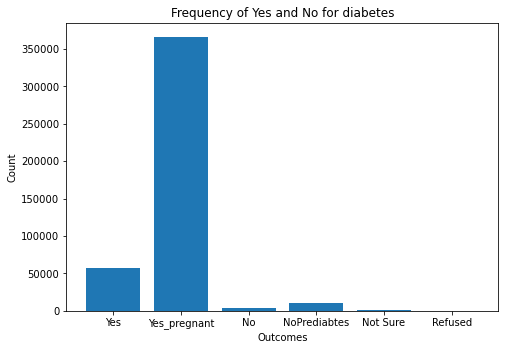

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Yes','Yes_pregnant','No','NoPrediabtes','Not Sure', 'Refused']
students = [YesWith.shape[0],YesNo.shape[0],YesFemale.shape[0],NoPre.shape[0],NotSure.shape[0],Refused.shape[0]]
ax.bar(langs,students)
plt.title('Frequency of Yes and No for diabetes')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.show()

In [32]:
diabetesage10 = dataframe2.loc[dataframe2['DIABAGE3'].isin([1,2,3,4,5,6,7,8,9,10])]
diabetesage20 = dataframe2.loc[dataframe2['DIABAGE3'].isin([11,12,13,14,15,16,17,18,19,20])]
diabetesage30 = dataframe2.loc[dataframe2['DIABAGE3'].isin([21,22,23,24,25,26,27,28,29,30])]
diabetesage40 = dataframe2.loc[dataframe2['DIABAGE3'].isin([31,32,33,34,35,36,37,38,39,40])]
diabetesage50 = dataframe2.loc[dataframe2['DIABAGE3'].isin([41,42,43,44,45,46,47,48,49,50])]
diabetesage60 = dataframe2.loc[dataframe2['DIABAGE3'].isin([51,52,53,54,55,56,57,58,59,60])]
diabetesage70 = dataframe2.loc[dataframe2['DIABAGE3'].isin([61,62,63,64,65,66,67,68,69,70])]
diabetesage80 = dataframe2.loc[dataframe2['DIABAGE3'].isin([71,72,73,74,75,76,77,78,79,80])]
diabetesage90 = dataframe2.loc[dataframe2['DIABAGE3'].isin([81,82,83,84,85,86,87,88,89,90])]
diabetesage100 = dataframe2.loc[dataframe2['DIABAGE3'].isin([91,92,93,94,95,96,97])]

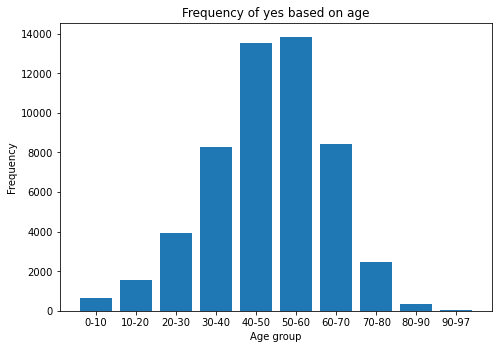

In [33]:
#plotting frequency of yes for different age groups
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts=[diabetesage10.shape[0],diabetesage20.shape[0],diabetesage30.shape[0],diabetesage40.shape[0],diabetesage50.shape[0],diabetesage60.shape[0],diabetesage70.shape[0],diabetesage80.shape[0],diabetesage90.shape[0],diabetesage100.shape[0]]
langs = ['0-10','10-20','20-30','30-40','40-50', '50-60','60-70','70-80','80-90','90-97']
ax.bar(langs,counts)
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.title('Frequency of yes based on age')
plt.show()

In [34]:
#replcing outcomes yes pregant with yes, no previousdiabetic to no and dont know and refused values to NAN
data['DIABETE4'].replace(2,1,inplace=True)
data['DIABETE4'].replace(4,2,inplace=True)
data['DIABETE4'].replace(3,2,inplace=True)
data['DIABETE4'].replace(7,np.nan,inplace=True)
data['DIABETE4'].replace(9,np.nan,inplace=True)
data['PREDIAB1'].replace(2,1,inplace=True)
data['PREDIAB1'].replace(7,np.nan,inplace=True)
data['PREDIAB1'].replace(9,np.nan,inplace=True)

In [35]:
plt.figure()
dataframe1 = data.groupby(['DIABETE4','PREDIAB1']).size()
dataframe1

DIABETE4  PREDIAB1
1.0       1.0           437
          3.0           765
2.0       1.0         15911
          3.0         96717
dtype: int64

<Figure size 432x288 with 0 Axes>

In [36]:
previousdiabetic=dataframe1.unstack()
previousdiabetic

PREDIAB1,1.0,3.0
DIABETE4,,
1.0,437,765
2.0,15911,96717


In [37]:
previousdiabpercent= previousdiabetic.div(previousdiabetic.sum())
previousdiabpercent

PREDIAB1,1.0,3.0
DIABETE4,,
1.0,0.026731,0.007848
2.0,0.973269,0.992152


In [38]:
previousdiabpercent= previousdiabetic.div(previousdiabetic.sum())
previousdiabpercent

PREDIAB1,1.0,3.0
DIABETE4,,
1.0,0.026731,0.007848
2.0,0.973269,0.992152


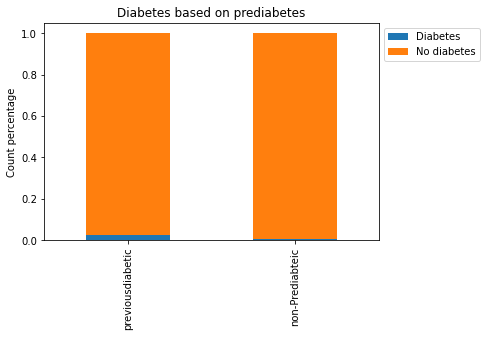

In [39]:
#plotting to see relationship between people who are diabetic and people who are previously diabetic

predictionp=previousdiabpercent.transpose()
predictionp
predictionp.plot(kind='bar',stacked=True).legend(["Diabetes", "No diabetes"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("previousdiabetic", "non-Prediabteic")
plt.xticks(positions, labels)
plt.ylabel('Count percentage')
plt.xlabel('')
plt.title("Diabetes based on prediabetes")
plt.show()